1. A simple undirected graph is complete if it contains an edge between every pair of distinct vertices. What does a depth-first search tree of a complete graph look like?

> **Answer**:

It looks like a path from the root node to the last node where every node except the last node (which is a leaf) has 1 child.

A complete graph is a form of an undirected graph where each pair of distinct vertices is connected by a unique edge. So in a complete graph, performing DFS results in a tree that is actually a path like a straight line which includes all the vertices. Once you visit a new vertex, you backtrack because there are no new vertices to go to next.

This is a DFS tree which is a linear structure because by definition a tree graph is a graph withot cycles (nodes don't get visited more than once). In this case, the graph is complete and connected and the DFS spans all vertices in the graph.

2. Give Python implementations of the `remove_vertex` and `remove_edge`
 methods for our adjacency map implementation of the Graph class below. Your method should run in linear and constant time, respectively.

In [ ]:
class Graph:
    def __init__(self, directed=False):
        self._adjacency = {}
        self._is_directed = directed

    def add_vertex(self, v):
        if v not in self._adjacency:
            self._adjacency[v] = {}

    def add_edge(self, u, v):
        if u not in self._adjacency:
            self.add_vertex(u)
        if v not in self._adjacency:
            self.add_vertex(v)
        self._adjacency[u][v] = True  # Assuming edge exists without specific weight
        if not self._is_directed:
            self._adjacency[v][u] = True  # Add reverse edge for undirected graph

    def remove_vertex(self, v):
        """Remove vertex v and all its incident edges from the graph."""
        #TODO: complete this function
        if v in self._adjacency:  # checks if vertex v exists in the adjacency list
          del self._adjacency[v]  # removes v if it exists
          for vertex in self._adjacency:  # iterates over all vertices in list
            if v in self._adjacency[vertex]:  # checks if v is connected to other vertices
              del self._adjacency[vertex][v]  # if v is connected, removes the connection

    def remove_edge(self, u, v):
        """Remove the edge from vertex u to vertex v."""
        #TODO: complete this function
        if u in self._adjacency and v in self._adjacency[u]:  # checks if both u and v exist in the adjacency list if an edge exists between them
          del self._adjacency[u][v] # if it does exist, deleted the edge
          if not self._is_directed and v in self._adjacency and u in self._adjacency[v]:  # if graph is undirected and there's an edge from v to u
            del self._adjacency[v][u] # removes the edge as well

    def draw_graph(self):
        import networkx as nx
        import matplotlib.pyplot as plt
        G = nx.DiGraph() if self._is_directed else nx.Graph()
        for vertex, edges in self._adjacency.items():
            for edge in edges:
                G.add_edge(vertex, edge)
        nx.draw(G, with_labels=True, node_color='lightblue',
                node_size=700, edge_color='gray')
        plt.show()

Initial Graph:


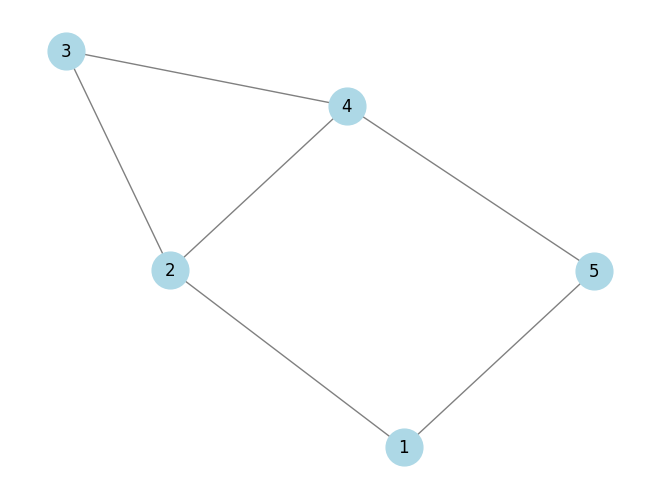

After Removing Vertex 3:


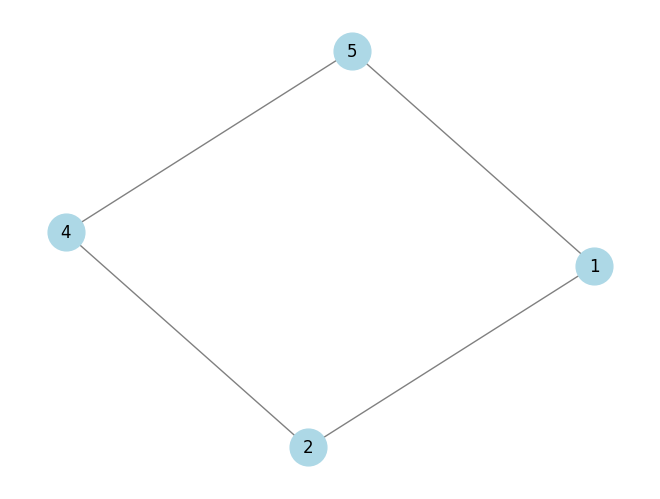

After Removing Edge (1, 5):


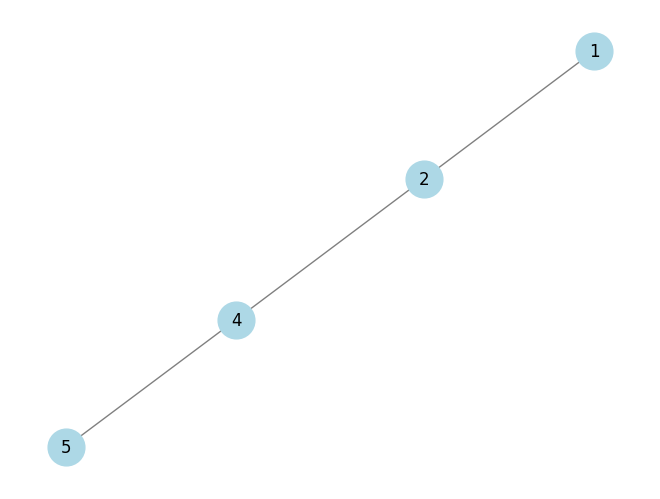

In [ ]:
# Initialize the graph
g = Graph(directed=False)  # Change to True for a directed graph

# Add vertices and edges
for v in range(1, 6):
    g.add_vertex(v)

edges = [(1, 2), (2, 3), (3, 4), (4, 5), (1, 5), (2, 4)]
for u, v in edges:
    g.add_edge(u, v)

# Draw the initial graph
print("Initial Graph:")
g.draw_graph()

# Remove a vertex and redraw
g.remove_vertex(3)
print("After Removing Vertex 3:")
g.draw_graph()

# Remove an edge and redraw
g.remove_edge(1, 5)
print("After Removing Edge (1, 5):")
g.draw_graph()

3. Let $T$ be the spanning tree rooted at the start vertex produced by the depth-first search of a connected, undirected graph $G$. Argue why every edge of $G$ not in $T$ goes from a vertex in $T$ to one of its ancestors, that is, it is a back edge.

> **Answer**:

As DFS takes each vertex v and spans its neighbors, v becomes parents of these neighbors. So if there is an edge that joins v and an unspanned neighbor x, then edge(v,x) will belong to the DFS tree T. The only edges left out are edges like (x,v) because v cannot be a child to x since it already it's parent.

Similarly we can see that for any pair of vertices (w and y), such that w is an ancestor of y in T, then a path from (w,y) exists in T. No path from (y,w) exists in T given the nature of DFS. Therefore, if G has the path (y,w) that will not be present in T.

So this is why we can say that every edge of G, not in T, goes from a vertex in T to one of its ancestors, because if it wasn't a back edge, then it would be covered in the DFS tree T.

4. Write a function, `components(G)`, for undirected graph $G$, that returns a dictionary mapping each vertex to an integer that serves as an identifier for its connected component. That is, two vertices should be mapped to the same identifier if and only if they are in the same connected component.

In [ ]:
def components(G):
    """
    Map each vertex in the graph G to an integer identifier of its connected component.

    :param G: An instance of the Graph class, representing an undirected graph.
    :return: A dictionary where keys are vertex identifiers and values are component identifiers.
    """
    #TODO: complete this function
    visited = set() # initializes empty set to keep track of visited vertices
    component_map = {}  # initializes empty dict to store vertex component mappings
    component_id = 0  # initializes tracker for current component identifier

    ''' define DFS function to traverse graph '''
    def dfs(vertex):
      nonlocal component_id # allows change of the outer component_id variable
      visited.add(vertex) # marks current vertex as visited
      component_map[vertex] = component_id  # maps current vertex to current component
      for neighbor in G._adjacency[vertex]: #iterates through neighbors of current vertex
        if neighbor not in visited: # if neighbor hasn't been visited
          dfs(neighbor) # recursively go to next neighbor

    ''' iterates through vertices of graph '''
    for vertex in G._adjacency:
      if vertex not in visited: # if vertex hasn't been visited
        dfs(vertex) # do DFS on this vertex
        component_id += 1 # increments component id for next connected component

    return component_map  # returns dict mapping vertices to connected components

In [ ]:
# Assuming the Graph class and components function are defined as previously discussed

# Create an instance of the Graph class for an undirected graph
g = Graph(directed=False)

# Add vertices
for v in range(1, 9):
    g.add_vertex(v)

# Add edges to form two separate connected components
# First component: 1-2-3-4
g.add_edge(1, 2)
g.add_edge(2, 3)
g.add_edge(3, 4)

# Second component: 5-6-7-8
g.add_edge(5, 6)
g.add_edge(6, 7)
g.add_edge(7, 8)

# Use the components function to find connected components
component_map = components(g)

# Print the component identifier for each vertex
print("Vertex to Component Identifier Mapping:")
for vertex, component_id in component_map.items():
    print(f"Vertex {vertex}: Component {component_id}")

Vertex to Component Identifier Mapping:
Vertex 1: Component 0
Vertex 2: Component 0
Vertex 3: Component 0
Vertex 4: Component 0
Vertex 5: Component 1
Vertex 6: Component 1
Vertex 7: Component 1
Vertex 8: Component 1


5.
Computer networks should avoid single points of failure, that is, network vertices that can disconnect the network if they fail. We say an undirected, connected graph $G$ is biconnected if it contains no vertex whose removal would divide $G$ into two or more connected components. Give an algorithm for adding at most $n$ edges to a connected graph $G$, with $n\geq 3$ vertices and $m\geq n-1$, to guarantee that $G$ is biconnected. Your algorithm should run in
 $O(m+n)$ time.

> **Answer**:

We can number the vertices 0 to n-10. Then we need to add an edge from vertex i to vertex (i+1) mod n if the edge doesn't already exist. This connects all vertices in a cycle which is how it is biconnected.